# I3D experiments on ChaLearn dataset

In [1]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context = "talk")

from IPython.display import Image, HTML, display

In [2]:
def acc_loss_show(sLogFile, sDescription, nEpoch = 250, colors=None):
    ylim_loss = (0.0,5.0)
    
    print(sDescription)
    
    dfLog = pd.read_csv(sLogFile)
    print("Validation set: max accuracy %.2f | min loss %.3f" % (dfLog.val_acc.max(), dfLog.val_loss.min()))
    #print("\n", dfLog.tail())
    
    if nEpoch == 0: nEpoch = len(dfLog)
    if colors == None: colors = ["b", "g"]
    
    # acc left side
    plt.subplots(figsize=(12,4))
    
    plt.subplot(1, 2, 1) # 1 row x 2 columns, now first subplot 
    plt.plot(dfLog.epoch, dfLog.acc, colors[0], label="Training accuracy")
    plt.plot(dfLog.epoch, dfLog.val_acc, colors[1], label="Validation accuracy")

    plt.xlim((0,nEpoch))
    plt.ylim((0,1))
    plt.legend()
    
    # loss right side
    plt.subplot(1, 2, 2)
    plt.plot(dfLog.epoch, dfLog.loss, colors[0], label="Training loss")
    plt.plot(dfLog.epoch, dfLog.val_loss, colors[1], label="Validation loss")

    plt.xlim((0,nEpoch))
    plt.ylim(ylim_loss)
    plt.legend()
    
    plt.show()
    
    return

ChaLearn003, rgb, I3D features, top-layer-model, lr=1e-3 => yeah!
Validation set: max accuracy 0.65 | min loss 0.805


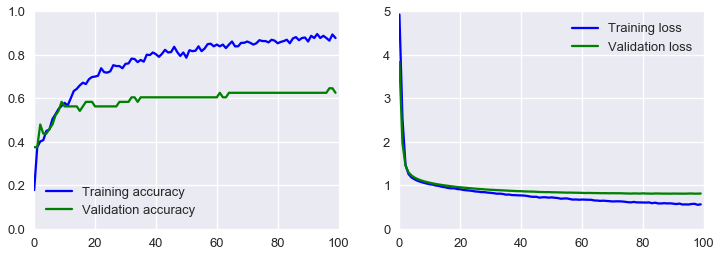

In [34]:
acc_loss_show("../log/20180619-1524-chalearn003-rgb-i3dtop-acc.csv",
    "ChaLearn003, rgb, I3D features, top-layer-model, lr=1e-3 => yeah!", 100)

ChaLearn003, optical flow, I3D features, top-layer-model, lr=1e-3 => :)
Validation set: max accuracy 0.60 | min loss 0.867


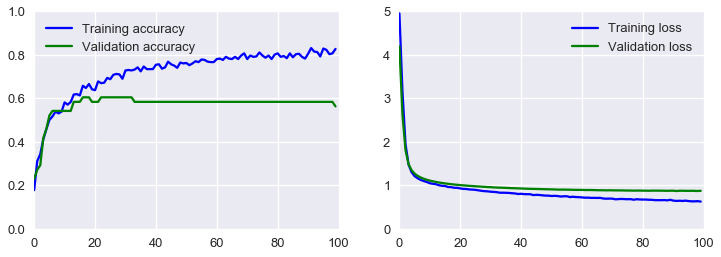

In [25]:
acc_loss_show("../log/20180619-1550-chalearn003-oflow-i3dtop-acc.csv",
    "ChaLearn003, optical flow, I3D features, top-layer-model, lr=1e-3 => :)", 100)

ChaLearn003, I3D finetune, lr=1e-3 => looks much better!
Validation set: max accuracy 0.63 | min loss 0.886


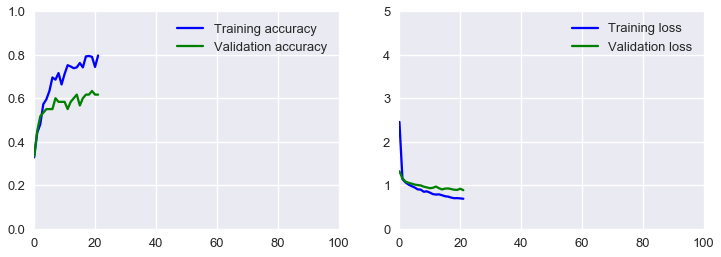

In [16]:
acc_loss_show("../log/20180619-1005-chalearn003-rgb-i3d-finetune-acc.csv",
    "ChaLearn003, I3D finetune, lr=1e-3 => looks much better!", 100)

Combination improves prediction

```
Predict with combined rgb + flow I3D top models.  /home/ubuntu/sign-language

Predict data-temp/04-chalearn/003/frame-i3d/val 
with I3D top model model/20180619-1524-chalearn003-rgb-i3dtop-best.h5 ...
Detected 62 samples in data-temp/04-chalearn/003/frame-i3d/val ...
Predict I3D top with generator ...
4/4 [==============================] - 0s 61ms/step
RGB model accuracy: 58.06%

Predict data-temp/04-chalearn/003/oflow-i3d/val 
with I3D top model model/20180619-1550-chalearn003-oflow-i3dtop-best.h5 ...
Detected 62 samples in data-temp/04-chalearn/003/oflow-i3d/val ...
Predict I3D top with generator ...
4/4 [==============================] - 0s 33ms/step
Flow model accuracy: 59.68%

Combined RGB + flow model accuracy: 61.29%
```